In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
print('rows: ',df.shape[0], 'columns:',df.shape[1])
df.info()
df.describe()

rows:  541909 columns: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.drop_duplicates(inplace=True)

**Cleaning the data & convert InvoiceDate into datetime format**

In [ ]:
df= df.dropna(subset=['CustomerID'])
df= df[df['Quantity'] > 0]
df= df[df['UnitPrice'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,2010-12


<Axes: xlabel='Description'>

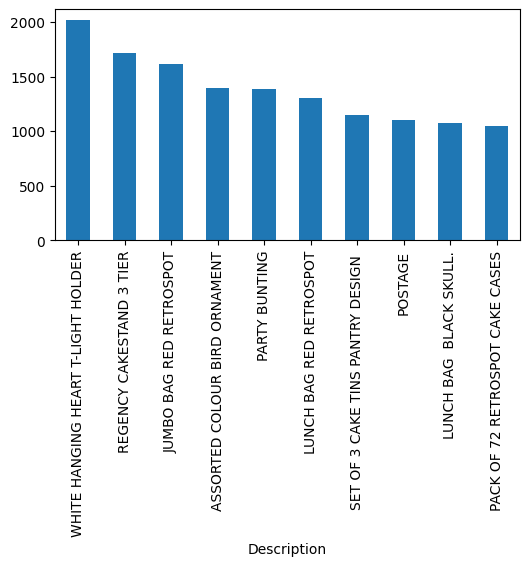

In [ ]:
top_product = df['Description'].value_counts().head(10)
top_product.plot(kind= 'bar',figsize=(6,3))

<Axes: title={'center': 'Country sale'}, xlabel='Country'>

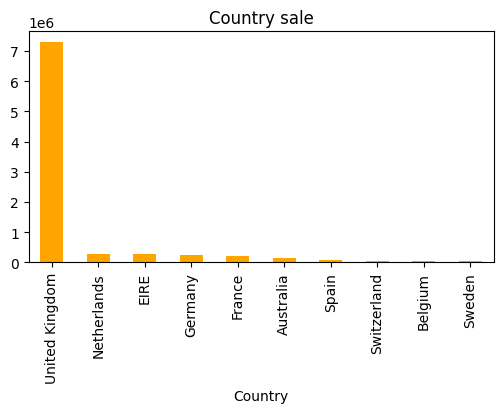

In [ ]:
country_sale = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
# print(country_sale)
country_sale.plot(kind='bar', figsize=(6,3), color='orange', title= 'Country sale')

**Convert invoicedate in to date time format**

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
monthly_revenu = df.groupby(['Year','Month'])['TotalPrice'].sum().reset_index()
# print(monthly_revenu)
monthly_revenu['Month_year']= monthly_revenu['Month'].astype(str)+'-'+ monthly_revenu['Year'].astype(str)
# print(monthly_revenu)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '12-2010'),
  Text(1, 0, '1-2011'),
  Text(2, 0, '2-2011'),
  Text(3, 0, '3-2011'),
  Text(4, 0, '4-2011'),
  Text(5, 0, '5-2011'),
  Text(6, 0, '6-2011'),
  Text(7, 0, '7-2011'),
  Text(8, 0, '8-2011'),
  Text(9, 0, '9-2011'),
  Text(10, 0, '10-2011'),
  Text(11, 0, '11-2011'),
  Text(12, 0, '12-2011')])

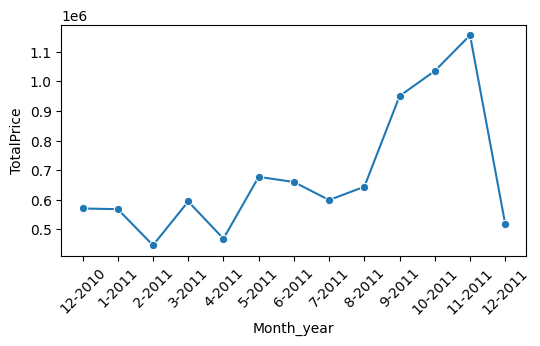

In [ ]:
plt.figure(figsize=(6,3))
sns.lineplot(data= monthly_revenu, x='Month_year', y='TotalPrice', marker='o')
plt.xticks(rotation=45)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [ ]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_top_products = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

top_product_per_month = (monthly_top_products.sort_values(['Month', 'Quantity'], ascending=[True,False])).drop_duplicates('Month')
top_product_per_month.head(10)

,Month,Description,Quantity
2383,2010-12,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5139
3526,2011-01,MEDIUM CERAMIC TOP STORAGE JAR,74215
5147,2011-02,EMPIRE DESIGN ROSETTE,3986
7695,2011-03,JUMBO BAG RED RETROSPOT,4924
11070,2011-04,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10224
13054,2011-05,SMALL POPCORN HOLDER,6730
14440,2011-06,JUMBO BAG RED RETROSPOT,3529
18057,2011-07,WORLD WAR 2 GLIDERS ASSTD DESIGNS,3600
18249,2011-08,ASSORTED COLOUR BIRD ORNAMENT,6417
21663,2011-09,JUMBO BAG RED RETROSPOT,4175


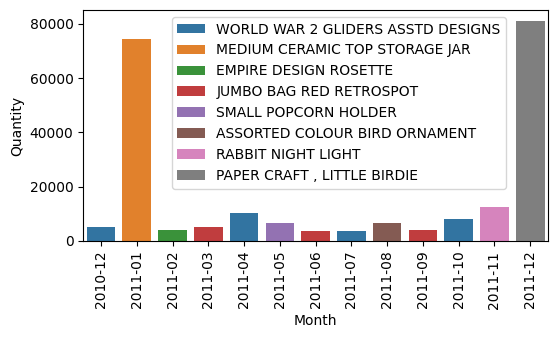

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(data=top_product_per_month, x= 'Month', y='Quantity', hue='Description')
plt.xticks(rotation=90)
plt.legend(loc='upper center',bbox_to_anchor=(0.55,1))

In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

**RFM Analysis**

In [ ]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (reference_date - x.max()).days,
                                    'InvoiceNo': 'nunique',
                                    'TotalPrice':'sum'
                                    }).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
9,12356.0,23,3,2811.43


In [ ]:
# Score each metric from 1 to 5
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine into single RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,5,5,555
2,12348.0,75,4,1797.24,2,4,4,244
3,12349.0,19,1,1757.55,4,1,4,414
4,12350.0,310,1,334.40,1,1,2,112


In [ ]:
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 4:
        return 'Recent Customers'
    elif row['F_Score'] >= 4:
        return 'Loyal Customers'
    elif row['M_Score'] >= 4:
        return 'Big Spenders'
    elif row['R_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Big Spenders
1,12347.0,2,7,4310.00,5,5,5,555,Champions
2,12348.0,75,4,1797.24,2,4,4,244,Loyal Customers
3,12349.0,19,1,1757.55,4,1,4,414,Recent Customers
4,12350.0,310,1,334.40,1,1,2,112,At Risk


In [ ]:
total_customers = rfm['CustomerID'].value_counts().sum()
total_sale = rfm['Monetary'].sum()

8887208.894

In [ ]:
champion = rfm[rfm['Segment'] == 'Champions']
num_of_champ = champion.value_counts().sum()
champ_amount = champion['Monetary'].sum()

print(f'Top {round((num_of_champ/total_customers)*100)}% of customers, contribute {round((champ_amount/total_sale)*100,2)}% of revenue')


Top 22% of customers, contribute 65.17% of revenue


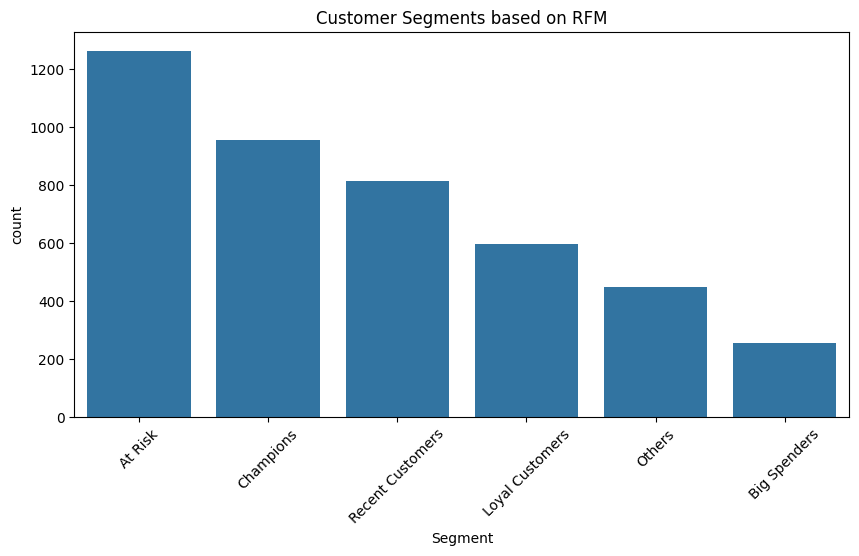

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title("Customer Segments based on RFM")
plt.xticks(rotation=45)
plt.show()


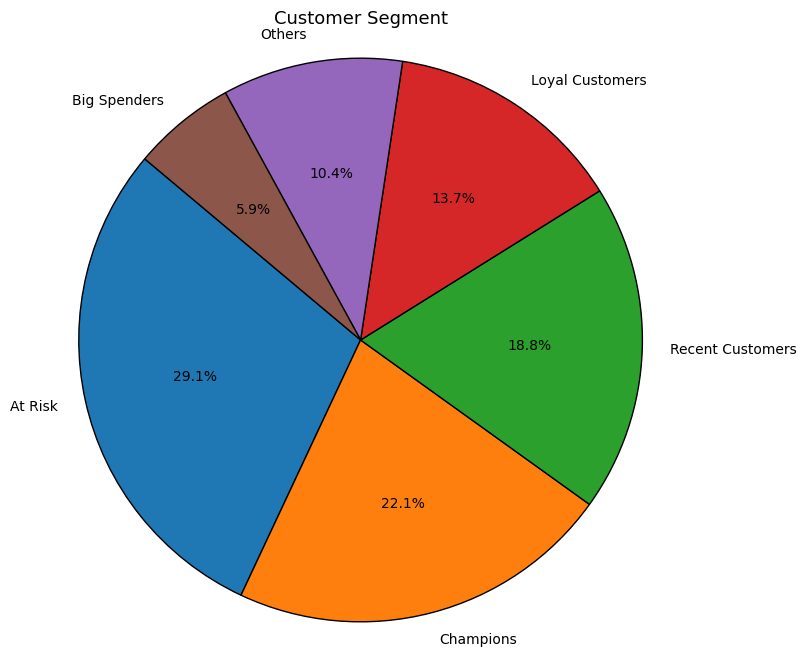

In [ ]:
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor':'black'})
plt.title('Customer Segment', fontsize=13)
plt.axis('equal')
plt.show()

In [ ]:
arr = [1,2,3,4,5,6,7,8,9]
pd.qcut(arr, 4, labels=["good", "medium", "bad", "hello"])

['good', 'good', 'good', 'medium', 'medium', 'bad', 'bad', 'hello', 'hello']
Categories (4, object): ['good' < 'medium' < 'bad' < 'hello']